Does the spotify distribution have the same weird peaks as the anomalies in the acousticbrainz data?
If **yes** then the peaks might be due to the songs/genres
If **no** then this further hints at the stability issues of the (low level) features and the codec/representation being the main issue

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import scipy.stats
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 15)})

from tqdm.notebook import tqdm
tqdm().pandas()

spotify = pd.read_hdf(Path.cwd() / 'datasets' / 'spotify.h5')

C:\Users\Chris\Miniconda3\envs\thesis\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
spotify

,id,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,41RpZW2lxAdnqDd2nMBzLQ,138960,4,0,4,0.000045,0.662,0.8230,0.952000,0.343,-1.711,0.0662,0.6210,177.745
1,5SM86TB7dU5n9Y23wLgcBY,214907,11,1,4,0.847000,0.582,0.0846,0.000000,0.696,-13.661,0.0354,0.3960,99.394
2,0ghgsfOnoXJT7jsS63U8et,196427,2,1,4,0.000058,0.229,0.9050,0.934000,0.367,-6.434,0.0698,0.1770,92.239
3,6mxDT6y9Sdp2802sieuwOA,213507,0,0,4,0.000009,0.532,0.8720,0.094500,0.333,-9.394,0.1250,0.1630,135.018
4,4qvYeGamP4p4wwMwb7EilZ,204200,10,0,4,0.404000,0.738,0.5370,0.010400,0.100,-12.137,0.4380,0.5110,91.965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106926,427FhVT5Qj3LKFhcsDdOsw,22947,6,0,4,0.868000,0.786,0.3870,0.000000,0.456,-10.347,0.5510,0.8260,94.345
106927,3v2L4aWnkYNKDMkrQvk93V,314920,1,1,4,0.549000,0.601,0.9140,0.000000,0.970,-5.824,0.5480,0.5410,104.648
106928,3fi7HlTctbdQRrwsH8tdQz,332893,7,1,4,0.000345,0.215,0.8790,0.012800,0.338,-6.578,0.1090,0.0645,169.960
106929,348lQoXFGBYde9jC66XlsX,196440,10,0,4,0.000071,0.437,0.9610,0.000435,0.048,-3.638,0.1060,0.3590,103.187


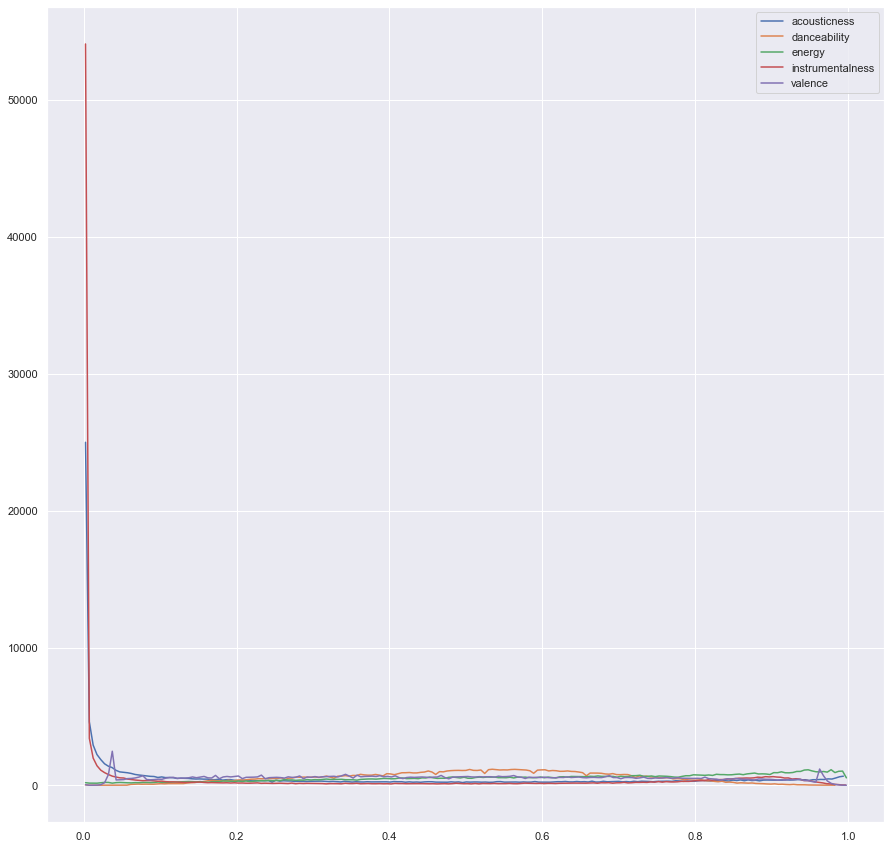

In [4]:
cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
data = [spotify[x] for x in cols]
plt.figure()

for i in range(0, len(cols)):
    y,binEdges = np.histogram(data[i],bins=200)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    plt.plot(bincenters, y, label=cols[i])

plt.legend()
plt.show()

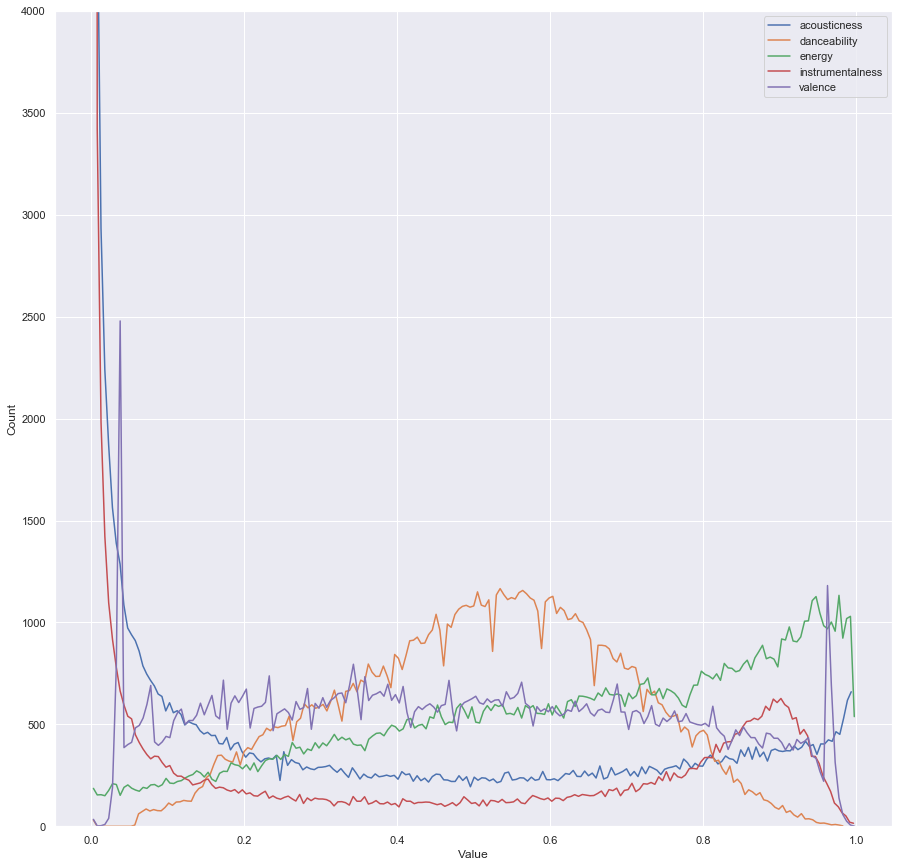

In [8]:
cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence']
data = [spotify[x] for x in cols]
plt.figure()
plt.ylim(top=4000)

for i in range(0, len(cols)):
    y,binEdges = np.histogram(data[i],bins=200)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    plt.plot(bincenters, y, label=cols[i])


#plt.title('Spotify feature distributions (200 bins)')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.show()

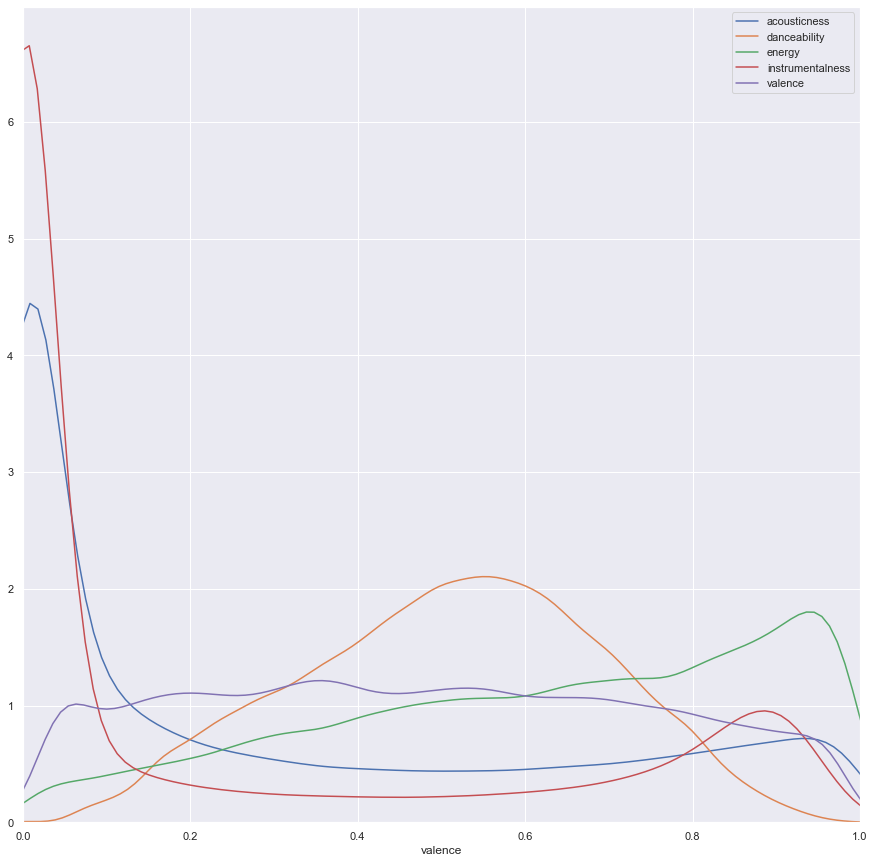

In [6]:
plt.figure()
for val in data:
    sns.distplot(val, hist=False, label=val.name)
plt.xlim(0,1)
plt.show()